In [1]:
%matplotlib inline

from __future__ import division
import os
import sys
from scipy import integrate, optimize
from scipy.interpolate import interp2d, interp1d

import numpy as np
from numpy import pi,sin,cos,tan,e,arctan,arcsin,arccos,sqrt
from numpy.random import randn
import matplotlib
import matplotlib.pyplot as P
from time import clock


matplotlib.rcParams['figure.figsize'] = (7, 5)
P.rcParams['text.usetex'] = True  # not really needed
P.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
P.rcParams["font.size"] = 24
P.rc('xtick', labelsize=18) 
P.rc('ytick', labelsize=18)
# P.rc('xtick', labelsize=20) 
# P.rc('ytick', labelsize=20)
np.set_printoptions(threshold=np.nan)


# sys.path.append("/Users/amadeus/Documents/10.semester/ma")
# from magmod import P_cdm_BBKS, D_z, rCom, H_0, c, H_z, E_z, Omega_m, W_tophat, T_obs, nutoz21, h
# from magmod import P_cdm_BBKS, D_z, rCom, H_0, c, H_z, E_z, Omega_m, T_obs, nutoz21, h
from magmod import *
from magbias_experiments import SKA_zhangpen, CLAR_zhangpen, SKA, hirax, cb_hirax, LSST, n


sigma_8_BBKS = 0.833959881058


In [2]:
# #preliminary, to be changed!!
# bHI = 1
# bgal = 1

lmin = 250; lmax = 30000 # lmin and lmax for Cl calculation
# lmin = 1; lmax = 1000 # lmin and lmax for Cl calculation
# ltab = np.arange(lmin,lmax)
# ltab = np.arange(lmin,lmax, 1000)
ltab = np.logspace(np.log10(lmin), np.log10(lmax), 25, dtype = int)
# ltab = np.array([280])

################################################
# ZhangPen:
zf = 0.75
dzf = 0.25
zfmin = zf - dzf; zfmax = zf + dzf

zb = (1.5 + 1.9)/2
dzb = 1.9 - zb
zbmin = zb - dzb; zbmax = zb + dzb
################################################



# ################################################
# zf = 0.3
# dzf = 0.005
# zfmin = zf - dzf; zfmax = zf + dzf

# zb = 1.5
# dzb = 0.01
# zbmin = zb - dzb; zbmax = zb + dzb
# ################################################



# zf = .1
# dzf = 0.06
# zfmin = zf - dzf; zfmax = zf + dzf

# zb = .4
# dzb = 0.06
# zbmin = zb - dzb; zbmax = zb + dzb

print "foreground from {} to {}".format(zfmin, zfmax)
print "background from {} to {}".format(zbmin, zbmax)



foreground from 0.5 to 1.0
background from 1.5 to 1.9


From ZiourHui:

In [3]:
#two ways to compute the same thing:




def Cl_delkap2_CAMB(ltable, zf, zb, delta_zf, Nint = 500):
    fac = bHI * (5*sg(zb) - 2)
    return Cl_HIxmag_CAMB(ltable, zf, zb, delta_zf, Nint = Nint) / fac

def Cl_delkap_CAMB(ltable, zf, zb, delta_zf, Nint = 500):
    fac = 3/2 * (H_0/c)**2 * Omega_m
    
    zmin = zf - delta_zf
    zmax = zf + delta_zf
    ztab = np.linspace(zmin, zmax, Nint) #do checks on this! should be 0 to inf
#     gtab = [g(zz, zb, dzb) for zz in ztab] # this is slow
    gtab = g(ztab, zb, dzb)
    
    integrand=np.zeros([len(ztab),len(ltable)])
    for il in range(len(ltable)):
        ell = ltable[il]
        integrand[:,il]= [(1+zzz) * W_tophat(zzz, zfmin, zfmax) * gtab / rCom(zzz)**2 * pknl(( ell)/rCom(zzz), zzz) for zzz in ztab]
    result= fac * np.trapz(integrand,ztab,axis=0)
    return result

Now we reproduce Fig 1 and 2 successfully (just adjust survey area and experiment accordingly):

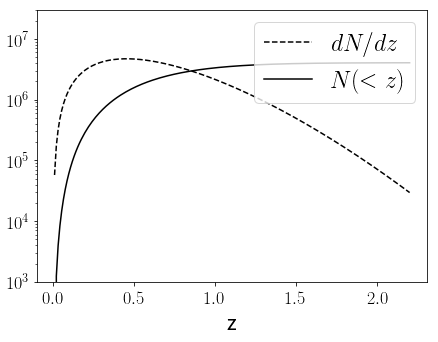

In [4]:
ztab = np.linspace(0.01, 2.2,200)
nsig=4
Flux = n * Ssys(ztab, CLAR_zhangpen) #we require an n-sigma detection


dNdztab = dNdz(ztab, nsig, CLAR_zhangpen)
Ntab = N_HI(ztab, nsig, CLAR_zhangpen)

fig = P.figure(); ax = fig.add_subplot(111);
ax.semilogy(ztab, dNdztab, ls = "--", color = "black", label = r"$dN/dz$" )
ax.semilogy(ztab, Ntab, color = "black", label = r"$N(<z)$")

ax.set_ylim((1e3, 3e7))
ax.set_xlabel("z")

P.legend(loc = "upper right")



In [5]:
print dNdztab

[  57435.99777409  173978.04611213  320371.82207544  485986.65667243
  664476.08679874  851476.91257087 1043765.97381202 1238855.97013615
 1434766.92235728 1629904.4207697  1822961.77904198 2012861.94683244
 2198706.62857801 2379767.98741931 2555432.61187583 2725196.87059211
 2888656.51333862 3045477.25978536 3195386.44148982 3338203.51087981
 3473775.58251864 3602001.8101951  3722815.01884516 3836213.44408336
 3942183.8508909  4040790.44967276 4132072.97829844 4216128.2972121
 4293057.16895999 4362986.44942865 4426028.58743061 4482378.16152919
 4532132.8253412  4575531.59389259 4612696.82712181 4643821.01465552
 4669150.0263006  4688769.08525293 4702989.1656758  4711947.26918178
 4715844.18418567 4714873.12968378 4709299.59962126 4699265.10958818
 4684977.50182448 4666620.7175095  4644469.25223594 4618645.25319342
 4589349.49737707 4556772.68052588 4521083.80229401 4482557.26813048
 4441271.74523255 4397398.73205957 4351190.42515178 4302736.41659121
 4252180.27373471 4199793.280863   

We were not able to calculate $\alpha$ as in the zhang&pen paper, so we simply fit a curve to their figures. 


From arXiv:0706.1071 equation A9: $s = \frac{d\log_{10} n_g}{dm}$ with the magnitude threshold $m = -2.5 \log_{10} F$. Therefore we have $s = -\frac{5}{2} \frac{d\log_{10} n_g}{d\log_{10}F} = \frac{5}{2} \alpha$

Thus we can also use the $s_g$ we used for Alkistis HIxmag Cls to get $\alpha$.

To test, we plot our fit for $\alpha$:

Caution, s_g is implemented without dependence on the experiment


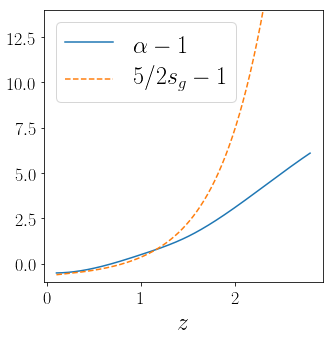

In [6]:
#now plot s :

z = np.linspace(0.1, 2.8, 500)

Ftab = nsig * Ssys(z, CLAR_zhangpen)
mtab = -2.5 * np.log10(Ftab)

fig = P.figure(figsize = (5,5));
ax2 = fig.add_subplot(111)


ax2.plot(z, alpha(z, CLAR_zhangpen)-1, label = r"$\alpha-1$")
ax2.plot(z, 5/2*sg(z)-1, label = r"$5/2 s_g-1$", ls = "--")

ax2.set_xlabel(r"$z$")
ax2.set_ylim((-1, 14))


P.legend()

The rest of this notebook is plotting the stuff from Alkistis' notes which seems to work (comparable to fig 5). First I have to get $\alpha$ right before I can compare to the quantities from Zhang&Pen directly.

In [7]:
#Calculate the HI X mag power spectrum Cls:
Cl_Hxm_tab = Cl_HIxmag_CAMB(ltab, zf, dzf, zb, dzb)
Cl_gxm_tab = Cl_gxmag_CAMB(ltab, zf, dzf, zb, dzb, n, CLAR_zhangpen)


Caution, s_g is implemented without dependence on the experiment


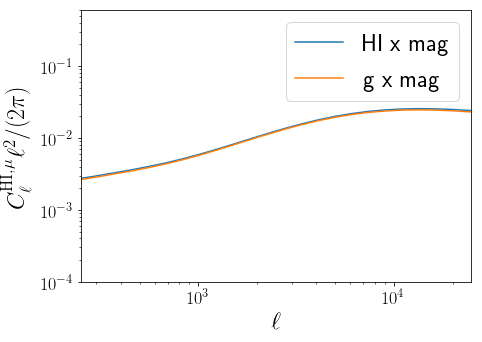

In [8]:
#plot it:
fig = P.figure(); ax = fig.add_subplot(111);

ax.loglog(ltab, Cl_Hxm_tab*ltab**2 / 2 / pi, label = "HI x mag")
ax.loglog(ltab, Cl_gxm_tab*ltab**2 /2/ pi, label = "g x mag")

ax.set_xlabel("$\ell$")
ax.set_ylabel("$C_\ell^\mathrm{HI, \mu} \ell^2/(2\pi)$")

ax.set_xlim((250,25000))
ax.set_ylim((1e-4, 6e-1))
ax.legend()


I think our $C_\ell^\mathrm{HI, mag}$ should match $C_\ell^{\mu g}$ Fig. 5 in Zhang&Pen almost, which it does! Both calculations from Alkistis' notes and following Z&P match. They are not exactly like in fig 5 because there they don't tell us what alpha they use exactly...

The main difference in the calculations is that Alkistis takes $s_g$ out of the integral, whereas in Z&P it's inside. As long as redshift bins are small I would not expect that to be significant.

[Their $\ell$ dependece is $C_\ell^{\mu g} \sim \Delta_m^2(\ell/r(z_f), z_f) / l^3$.

For us it's $C_\ell^\mathrm{HI, mag} \sim P((\ell + 1/2)/r(z),z))$.]

Next step: get error on gxmag

NOW: signal to noise!!!

In [9]:
#making new zf:

# zf = 0.9
# dzf = 0.05
zf = 1.1
dzf = 0.25
zb = 1.7
dzb = 0.2


lstart = 10; lend = 20000; 
lN = 100
# ltab = np.linspace(lstart, lend, lN, dtype = int)
ltab = np.logspace(np.log10(lstart), np.log10(lend), lN, dtype = int)
powspeclist = [C_l_HIHI_CAMB, C_l_gg_CAMB, Cl_HIxmag_CAMB]
print "foreground from {} to {}".format(zf-dzf, zf+dzf)

print "background from {} to {}".format(zb-dzb, zb+dzb)


foreground from 0.85 to 1.35
background from 1.5 to 1.9


In [10]:
#without shot noise:
S2N_SKA = S2N(ltab, zf, dzf, zb, dzb, powspeclist, SURVEY=SKA)
S2N_HIRAX = S2N(ltab, zf, dzf, zb, dzb, powspeclist, SURVEY=hirax)
S2N_cbHIRAX = S2N(ltab, zf, dzf, zb, dzb, powspeclist, SURVEY=cb_hirax)
S2N_CV = S2N(ltab, zf, dzf, zb, dzb, powspeclist, SURVEY="CV")

We assume a perfect galaxy survey!
calculating single dish autocorrelation noise
Caution, s_g is implemented without dependence on the experiment


magmod.py:546: RuntimeWarning: divide by zero encountered in true_divide
  return sigpix**2 * ompix / W_ell
magmod.py:269: RuntimeWarning: overflow encountered in multiply
  num = X2 + (HIHI + N_ell) * (gg + Cshot)


Caution, s_g is implemented without dependence on the experiment
We assume a perfect galaxy survey!
calculating interferometer noise...
Caution, s_g is implemented without dependence on the experiment
Caution, s_g is implemented without dependence on the experiment
We assume a perfect galaxy survey!
calculating interferometer noise...
Caution, s_g is implemented without dependence on the experiment
Caution, s_g is implemented without dependence on the experiment
Caution, s_g is implemented without dependence on the experiment
Caution, s_g is implemented without dependence on the experiment


In [11]:
#with shot noise:
S2N_SKA_LSST = S2N(ltab, zf, dzf, zb, dzb, powspeclist, SURVEY=[SKA, LSST])
# S2N_HIRAX_LSST = S2N(ltab, zf, dzf, zb, dzb, powspeclist, SURVEY=[hirax, LSST])
S2N_cbHIRAX_LSST = S2N(ltab, zf, dzf, zb, dzb, powspeclist, SURVEY=[cb_hirax, LSST])

We use all sky for calculating N(z)
calculating single dish autocorrelation noise
Caution, s_g is implemented without dependence on the experiment
Caution, s_g is implemented without dependence on the experiment
We use all sky for calculating N(z)
calculating interferometer noise...
Caution, s_g is implemented without dependence on the experiment
Caution, s_g is implemented without dependence on the experiment


In [26]:
SKAcum = np.sqrt(np.array([np.sum( S2N_SKA[:i]**2) for i in range(len(S2N_SKA))]))
cbHIRAXcum = np.sqrt(np.array([np.nansum( S2N_cbHIRAX[:i]**2) for i in range(len(S2N_cbHIRAX))]))
cbHIRAX_LSSTcum = np.sqrt(np.array([np.nansum( S2N_cbHIRAX_LSST[:i]**2) for i in range(len(S2N_cbHIRAX_LSST))]))
SKA_LSSTcum = np.sqrt(np.array([np.sum( S2N_SKA_LSST[:i]**2) for i in range(len(S2N_SKA_LSST))]))
CVcum = np.sqrt(np.array([np.sum( S2N_CV[:i]**2) for i in range(len(S2N_CV))]))

(0.1, 157.94472406542138)

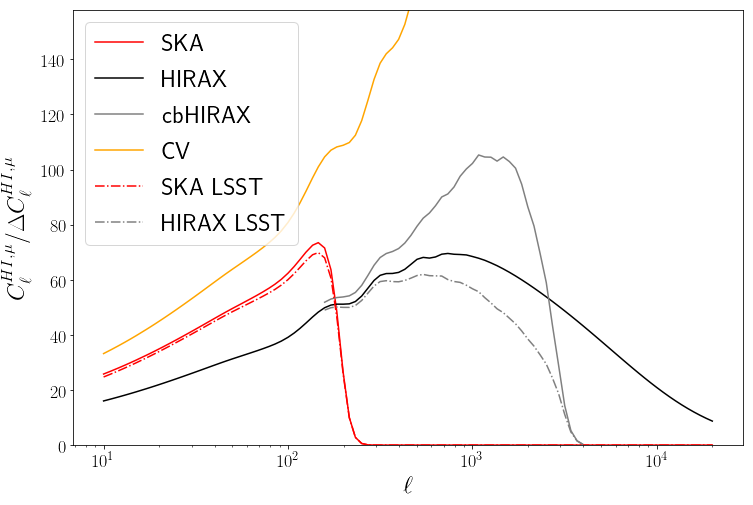

In [27]:
fig = P.figure(figsize = (12,8)); ax1 = fig.add_subplot(111); 

ax1.semilogx(ltab, S2N_SKA, label = "SKA", color = "red")
ax1.semilogx(ltab, S2N_HIRAX, label = "HIRAX", color = "black")
ax1.semilogx(ltab, S2N_cbHIRAX, label = "cbHIRAX", color = "grey")
ax1.semilogx(ltab, S2N_CV, label = "CV", color = "orange")

# ax1.semilogx(ltab, CVcum, ls = ":", color = "orange")
# ax1.semilogx(ltab, HIRAXcum, ls = ":", color = "black")
# ax1.semilogx(ltab, SKAcum, ls = ":", color = "red")

ax1.semilogx(ltab, S2N_SKA_LSST, label = "SKA LSST", color = "red", ls = "-.")
ax1.semilogx(ltab, S2N_cbHIRAX_LSST, label = "HIRAX LSST", color = "grey", ls = "-.")

ax1.set_ylabel("$C_\ell^{HI,\mu} / \Delta C_\ell^{HI,\mu} $")
ax1.set_xlabel("$\ell$")
ax1.legend(loc = "upper left")

ax1.set_ylim((0.1,1.5 * np.nanmax((S2N_cbHIRAX, S2N_SKA))))
# ax1.set_ylim((0.1,1.5 * np.amax((HIRAXcum, SKAcum))))

(0.1, 752.2372721379043)

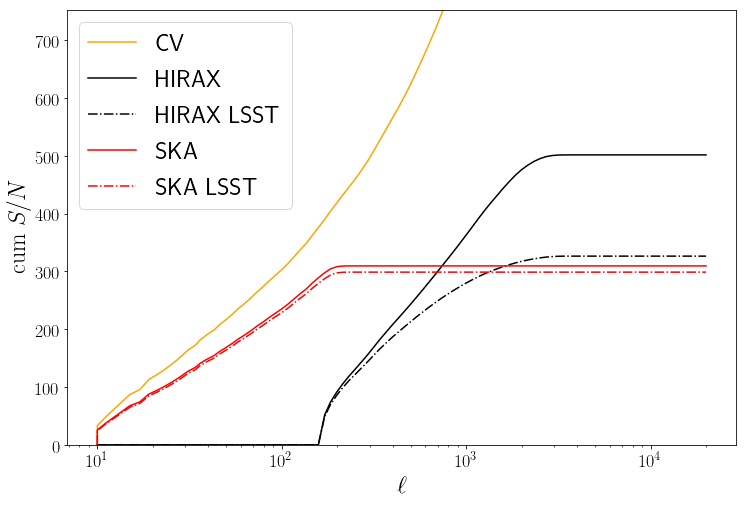

In [29]:
fig = P.figure(figsize = (12,8)); ax1 = fig.add_subplot(111); 


ax1.semilogx(ltab, CVcum, color = "orange", label = "CV")
ax1.semilogx(ltab, cbHIRAXcum, color = "black", label = "HIRAX")
ax1.semilogx(ltab, cbHIRAX_LSSTcum, ls = "-.", color = "black", label = "HIRAX LSST")
ax1.semilogx(ltab, SKAcum, color = "red", label = "SKA")
ax1.semilogx(ltab, SKA_LSSTcum, ls = "-.", color = "red", label = "SKA LSST")

ax1.set_ylabel("$\mathrm{cum~} S/N$")
ax1.set_xlabel("$\ell$")
ax1.legend(loc = "upper left")

ax1.set_ylim((0.1,1.5 * np.amax((SKAcum, cbHIRAXcum))))

This does not look bad! But we should check the noise calculations! I feel like the signal to noise is really high (maybe too high), but maybe that changes once we include shot noise? But probably not much if we use something like LSST with many many galaxies.

TODO:

-- look again at $s_g$ and maybe get a better one?

-- Sort out the sky coverage issue when combingin HI and galaxy surveys

-- Shot noise calculation might be wrong, I am unsure.

-- Interferometer noise might be wrong, I am unsure.

-- Single dish nosie should be okay, but we should check

# --Most importantly something to check the noise calculations against!